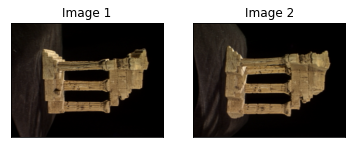

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

f = open(r'./templeSparseRing/templeSR_par.txt','r')
assert f is not None
n = int (f.readline())

# Reading the information on the first image

l = f.readline().split()
im1_fn = l[0]  # im1 file name

K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Reading the information on the second image

l = f.readline().split()
im2_fn = l[0] # im2 file name 
 
K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Read the two image sand show
im1 =  cv.imread(r'./templeSparseRing/'+ im1_fn , cv.IMREAD_COLOR)
im2 =  cv.imread(r'./templeSparseRing/'+ im2_fn , cv.IMREAD_COLOR)
fig , ax =  plt.subplots(1,2)
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_title('Image 1')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
ax[1].set_title('Image 2')
ax[1].set_xticks([]), ax[1].set_yticks([])


# Compute P1 and P2

P1 = K1 @ np.hstack((R1,t1))  # P = K*[R|t]
P2 = K2 @ np.hstack((R2,t2))  # P = K*[R|t]






In [3]:
# compute F

from scipy.linalg import null_space 

def skew(x):
    x = x.ravel()
    return np.array ([[0, -x[2], x[1]],[x[2], 0, -x[0]], [-x[1], x[0],0]])

C = null_space(P1) 
C = C * np.sign(C[0,0])

e2 = P2 @ C

e2x = skew(e2)

F = e2x @ P2 @ np.linalg.pinv(P1)
print(F)

[[-2.87071497e-04 -3.96261289e-02  2.94221686e+02]
 [-3.55039713e-02  1.65329260e-04  1.78860854e+01]
 [-2.76702814e+02  2.12942175e+01 -9.06669374e+03]]


([], [])

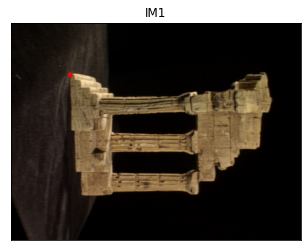

In [5]:
x = np.array([130, 115,1])

cv.circle(im1 , (x[0], x[1]), 5 , (0,0,255),-1)
fig , ax =  plt.subplots()
ax.imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax.set_title('IM1')
ax.set_xticks([]), ax.set_yticks([])


([], [])

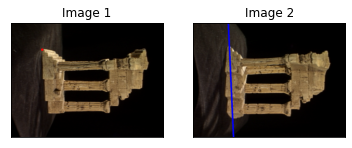

In [6]:
# Compute the epipolar line corresponding to the given x and plot

l2 = F @ x.T
p1 = np.array([0, (l2 [0]*0 + l2[2])/l2[1]]).astype(int)
p2 = np.array([500, (l2[0]*500 + l2[2])/l2[1]]).astype(int)

cv.line(im2, (p1[0],p1[1]),(p2[0], p2[1]),(255,0,0),5)

fig , ax =  plt.subplots(1,2)
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_title('Image 1')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
ax[1].set_title('Image 2')
ax[1].set_xticks([]), ax[1].set_yticks([])



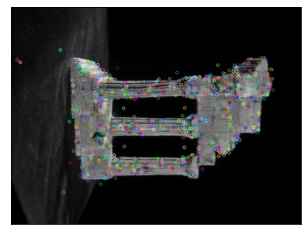

In [21]:
# Plot the keypoints

im1 =  cv.imread(r'./templeSparseRing/'+ im1_fn , cv.IMREAD_COLOR)

gray1 = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(im1,None)

img_1 = cv.drawKeypoints(gray1,keypoints_1,im1)
plt.imshow(img_1)

plt.xticks([]), plt.yticks([])
plt.show()



([], [])

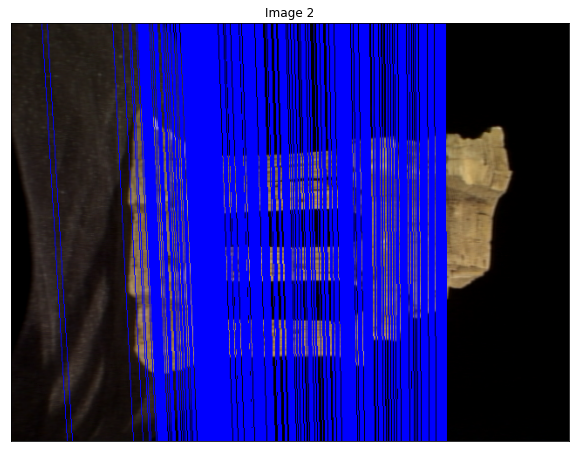

In [41]:
# Computing eppipolar lines and plot
im2 =  cv.imread(r'./templeSparseRing/'+ im2_fn , cv.IMREAD_COLOR)

for x in keypoints_1:
   #print(x.pt)
   x = np.array([x.pt[0], x.pt[1],1])
   l2 = F @ x
   p1 = np.array([0, (l2 [0]*0 + l2[2])/l2[1]]).astype(int)
   p2 = np.array([500, (l2[0]*500 + l2[2])/l2[1]]).astype(int)

   cv.line(im2, (p1[0],p1[1]),(p2[0], p2[1]),(255,0,0),1)

fig, ax = plt.subplots(figsize = (10,9))

ax.imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
ax.set_title('Image 2')
ax.set_xticks([]), ax.set_yticks([])